<table>
  <tr>
    <td> <b> Roll no.: </b> N031 </td>
    <td> <b> Name: </b> Shourya Gupta </td>
  </tr>
  <tr>
    <td> <b> Program and Division: </b> MBA Tech CE D</td>
    <td> <b> Batch: </b> B1 </td>
  </tr>   
</table>

# **Experiment 10**

### **Aim**

Text classification/ Sentiment Analysis using machine learning classification techniques

**1. Create machine learning models to perform Text classification of the given dataset using different feature representation techniques using NB, SVM, Logistic Regression, Random Forest classifier and deep neural network.**

**a. Load and explore the dataset**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files
# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction import stop_words
# pre-processing of text
import string
import re
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# import time function from time module to track the training duration
from time import time

**b. Performing text classification**

In [ ]:
#import numpy as np
#from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
doc=np.array(['I am John, I like Cricket, Have cricket a Nice Day'])
bag=vect.fit_transform(doc)

In [ ]:
# Finding the word position at the time of frequesncy count
print(vect.vocabulary_)

{'am': 0, 'john': 4, 'like': 5, 'cricket': 1, 'have': 3, 'nice': 6, 'day': 2}


In [ ]:
# to check how many times a word repeats
print(bag.toarray())

[[1 2 1 1 1 1 1]]


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)
#tfidf=TfidfTransformer(use_idf=True,norm='12', smooth_idf=True)
tfidf=TfidfTransformer(use_idf=True,smooth_idf=True)
# Display precise value how many time it appear
print (tfidf.fit_transform (bag).toarray())

[[0.32 0.63 0.32 0.32 0.32 0.32 0.32]]


**c. Working on IMDB dataset**

1. Import and process data

In [ ]:
df= pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Number  of rows (instances) and columns in the dataset
df.shape

(50000, 2)

In [ ]:
# Class distribution in the dataset
df["sentiment"].value_counts()/df.shape[0]

,count
sentiment,
positive,0.5
negative,0.5


**Inferences:**  Sentiments are equally balanced, with both positive and negative sentiments having a score of 0.5. This suggests that the text being analyzed does not lean strongly toward either positive or negative sentiment but instead has a neutral overall tone.

In [ ]:
# convert label to a numerical variable
#df = df[df.sentiment != "not sure"] # removing the data where we don't want relevance="not sure".
#df.shape


In [ ]:
#df['sentiment'] = df.sentiment.map({'yes':1, 'no':0}) # relevant is 1, not-relevant is 0.
#df = df[["review","sentiment"]] # Let us take only the two columns we need.
#df.shape

2. Vectorizing textual data

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# text preprocessing
import string
from nltk.corpus import stopwords

stopwords = stopwords.words('english') # import stopwords from nltk.corpus

def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [ ]:
# vectorizing textual data (product reviews) into a numerical format using the TF-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(
    use_idf=True,
    #norm='12',
    smooth_idf=True)

y=df['sentiment'].values
x=tfidf.fit_transform(df['review'].values.astype('U'))

**Inference:** TF-IDF method, which assigns higher weight to terms that are significant in a given document but rare across the corpus

3. Building the model

In [ ]:
from sklearn.model_selection import train_test_split
from re import X

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=5,
                         scoring='accuracy',
                         n_jobs=-1,
                         verbose=3,
                         max_iter=300).fit(x_train,y_train)
saved_model=open('saved_model.sav','wb')
pickle.dump(clf,saved_model)
saved_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [ ]:
filename='saved_model.sav'
saved_clf = pickle.load(open(filename,'rb'))
saved_clf.score(x_test,y_test)

0.89732

4. Train the classifier and predict for test data

In [ ]:
# Train the classifier
y_pred = saved_clf.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.89732
Confusion Matrix:
 [[11106  1368]
 [ 1199 11327]]


In [ ]:
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

Accuracy:  0.89732
ROC_AOC_Score:  0.9612529971649668


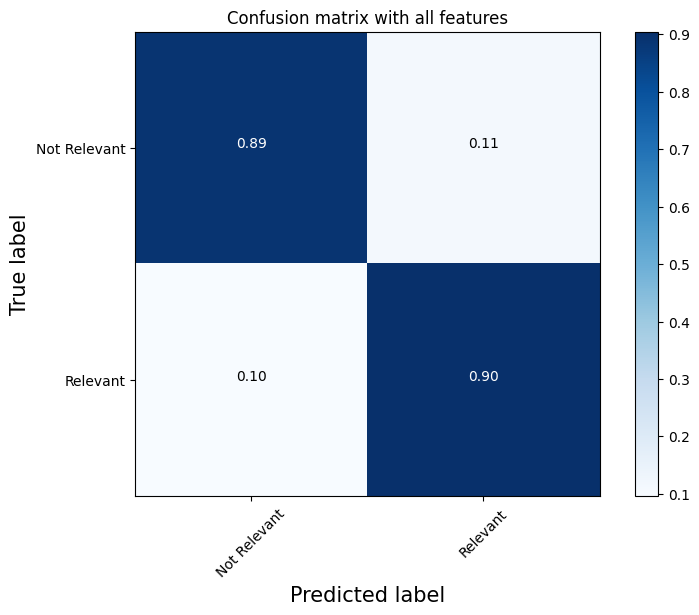

In [ ]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred)) # Use y_pred instead of y_pred_class


# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred) # Use y_pred instead of y_pred_class
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = saved_clf.predict_proba(x_test)[:, 1] # Use saved_clf and x_test
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

**Inference:** We can notice that the classifier is doing poorly with identifying relevant articles, while it is doing well with non-relevant ones. Our large feature vector could be creating a lot of noise in the form of very rarely occurring features that are not useful for learning. Let us change the count vectorizer to take a certain number of features as maximum.

**d. Hotel Reivew Sentiment Analysis using Python**

1. Import and process data

In [ ]:
import pandas as pd
Reviewdata=pd.read_csv('train.csv')
# Data Credit-https://www.kaggle.com/datasets/anu0012/hotel-review/data

In [ ]:
Reviewdata.shape

(38932, 5)

In [ ]:
Reviewdata.head()
# IS_Response is the target attribute of the dataset

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
Reviewdata.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [ ]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


2. Data Cleanin & EDA

In [ ]:
# Checking the Missing values in the Data Set and printing the Percentage for Missing Values for each Columns
count= Reviewdata.isnull().sum().sort_values(ascending=False)
percentage=((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,
                      keys=['count','Percentage'])
print('Count and Percentage of missing values for the columns:')
missing_data

Count and Percentage of missing values for the columns:


,count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percentage for default 

Is_Response
happy        136.24
not happy     63.76
Name: proportion, dtype: float64


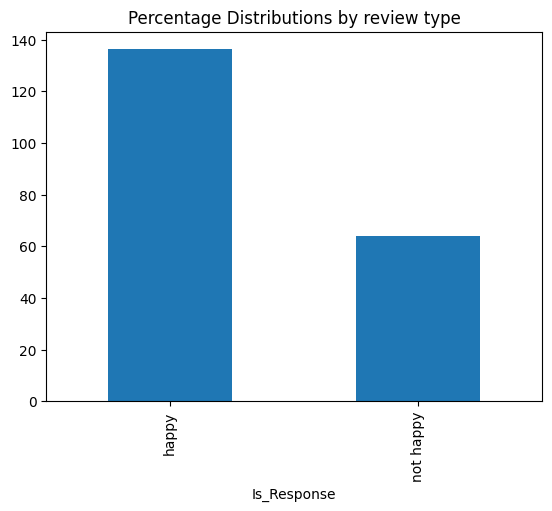

In [ ]:
from pandas.core.indexes.base import InvalidIndexError
# Checking for the Distribution of Default
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default \n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*200,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*200,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
#Removing irrelevent colunm
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'],inplace =True)

In [ ]:
#Apply first level of cleaning
import re
import string
# This Function converts to lower-case ,remove square bracket, removes numbers and punctuation
def text_clean_1(text):
  text=text.lower()
  # Remove the squared bracket
  text=re.sub ('\[.*?\]',' ', text)
  # Remove the punctuation
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  #Remove the digits
  text=re.sub('\w*\d\w*','',text)
  return text

cleaned1=lambda x: text_clean_1(x)

In [ ]:
# Let's take a look at the updated text
Reviewdata['cleaned_description']=pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [ ]:
#Apply a second round of cleaning
def text_clean_2(text):
 # Replacing quotes with blank
  text=re.sub('[""''...]','',text)
  # Replacing new lines with blank
  text=re.sub('\n','',text)
  return text

cleaned2=lambda x: text_clean_2(x)

In [ ]:
# Let's take a Look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


3. Model Training

In [ ]:
from sklearn.model_selection import train_test_split
Independent_var=Reviewdata.cleaned_description_new
Dependent_var=Reviewdata.Is_Response
IV_train,IV_test,DV_train,DV_test=train_test_split(Independent_var,Dependent_var,test_size=0.1,random_state=225)
print('IV_train:',len(IV_train))
print('IV_test:',len(IV_test))
print('DV_train:',len(DV_train))
print('DV_test:',len(DV_test))


IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec=TfidfVectorizer()
clf2=LogisticRegression(solver="lbfgs")
from sklearn .pipeline import Pipeline
# Pipline excecute the instruction line by line

In [ ]:
# It first creat a vectorizer and then creat the classifier as well
model =Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train,DV_train)
from sklearn.metrics import confusion_matrix
predictions=model.predict(IV_test)
confusion_matrix(predictions,DV_test)

array([[2417,  302],
       [ 154, 1021]])

4. Model prediction

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy: ", accuracy_score(predictions,DV_test))
print("Precision: ", precision_score(predictions,DV_test,average='weighted'))
print("Recall: ", recall_score(predictions,DV_test,average='weighted'))

Accuracy:  0.8828967642526965
Precision:  0.8892960430354139
Recall:  0.8828967642526965


5. Testing the model on new reviews

In [ ]:
example=["I am Happy"]
result=model.predict(example)
print(result)

['happy']


In [ ]:
example=["I am unhappy"]
result=model.predict(example)
print(result)

['not happy']


In [ ]:
example=["I am sad"]
result=model.predict(example)
print(result)

['not happy']


In [ ]:
example=["I am feeling like a monkey"]
result=model.predict(example)
print(result)

['not happy']


6. False negatives

In [ ]:
example=["I am deligthed"]
result=model.predict(example)
print(result)

example2=["I am  not happy"]
result2=model.predict(example2)
print(result2)

['not happy']
['not happy']


**Inference:** For some cases this model not working properly so what kind of improvement is needed for the model to increase the accuracy of the model

### **Observations and Learning**

Understand how to classify the text data into different classes.

### **Conclusion**

Design, Implement and test models for different text classification NLP applications (like sentiment analysis etc) using statistical and sequence models.


In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>